In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\mental_health_workplace_survey.csv")
df = df.drop(columns=["EmployeeID"])
print(df)

      Age      Gender    Country            JobRole Department  \
0      50        Male         UK    Sales Associate         HR   
1      36        Male    Germany  Software Engineer         IT   
2      29  Non-binary      India           IT Admin         IT   
3      42        Male  Australia      HR Specialist         IT   
4      40        Male     Brazil   Customer Support    Support   
...   ...         ...        ...                ...        ...   
2995   28      Female     Brazil  Marketing Manager      Sales   
2996   24        Male     Brazil   Customer Support  Marketing   
2997   22      Female     Canada  Marketing Manager  Marketing   
2998   57  Non-binary  Australia     Data Scientist         HR   
2999   46  Non-binary      India  Software Engineer         IT   

      YearsAtCompany  WorkHoursPerWeek RemoteWork  BurnoutLevel  \
0                 14                47         No          3.37   
1                  1                59     Hybrid          7.39   
2     

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le    

In [5]:
X = df.drop(columns=["BurnoutRisk"])
y = df["BurnoutRisk"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]


In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred_lda = lda.predict(X_test_scaled)
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]

In [10]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

print("\nLinear Discriminant Analysis")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lda))

Logistic Regression
Accuracy: 0.9966666666666667
Confusion Matrix:
 [[397   2]
 [  0 201]]
ROC AUC: 0.9999127171161735

Linear Discriminant Analysis
Accuracy: 0.95
Confusion Matrix:
 [[369  30]
 [  0 201]]
ROC AUC: 0.9997506203319243


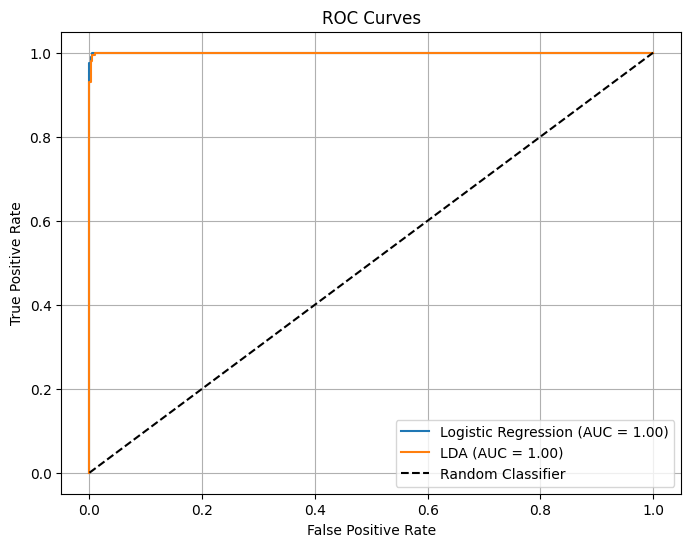

In [11]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})')
plt.plot(fpr_lda, tpr_lda, label=f'LDA (AUC = {roc_auc_score(y_test, y_prob_lda):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()